# 🏥 Healthcare Insurance Cost Analysis  
## 📊 Notebook 04 – Exploratory Data Analysis and Visualisations 

| Feild | Description |
|-------|-------------|
|**Author:** |Robert Steven Elliott  |
|**Course:** |Code Institute – Data Analytics with AI Bootcamp |  
|**Project Type:** |Individual Formative Project  | 
|**Date:** |October 2025  |

---

## Hypotheses

| ID     | Hypothesis                                                                             | Expected Outcome                                                                |
| ------ | -------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------- |
| **H1** | Smoking status significantly increases insurance charges.                              | Smokers will pay considerably higher premiums due to elevated health risks.     |
| **H2** | Higher BMI correlates with higher insurance charges.                                   | Individuals with obesity or high BMI values will face greater healthcare costs. |
| **H3** | Age positively correlates with insurance charges.                                      | Older individuals will have higher medical expenses and premiums.               |
| **H4** | Gender has little or no significant effect on insurance charges.                       | Gender differences will be minimal after accounting for smoking and BMI.        |
| **H5** | Geographic region may slightly influence charges, but lifestyle factors will dominate. | Regional cost differences exist but are weaker than smoking/BMI effects.        |
| **H6** | Individuals with more children may experience slightly higher insurance costs.         | Larger families may increase total policy coverage but only modestly.           |



## Objectives
- Conduct exploratory data analysis (EDA) to uncover trends and patterns.  
- Produce static visualisations using Matplotlib and Seaborn.  
- Create interactive dashboards using Plotly.  
- Summarise relationships between key features and healthcare insurance charges.

## Inputs
- `data/final/insurance_final.csv`

## Outputs
- Static and interactive visualisations saved to `figures/`  
- Analytical insights summarised for presentation and documentation.

## Additional Comments
Run after `03_feature_engineering.ipynb`.  
Ensure your enriched dataset is available in `data/processed/insurance_enriched.csv`.


---

# Ignore Warnings

This project uses alot of old library versions so we will turn of future warnings

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Change Working Directory

In [2]:
import os
PROJECT_ROOT = os.path.join(os.getcwd(), "..")
os.chdir(PROJECT_ROOT)
print("✅ Working directory set to project root:", os.getcwd())

✅ Working directory set to project root: /home/robert/Projects/health-insurance-cost-analysis


---

# Import Libraries and Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

pd.set_option('display.max_columns', None)
sns.set_theme(style="whitegrid")

df = pd.read_csv("data/final/insurance_final.csv")
print("✅ Data loaded successfully.")
df.head()


✅ Data loaded successfully.


,age,sex,bmi,children,smoker,region,charges,bmi_category,age_group,family_size_category
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,18-25,No Children
1,18,male,33.770,1,no,southeast,1725.55230,Obese,18-25,Small Family
2,28,male,33.000,3,no,southeast,4449.46200,Obese,26-35,Medium Family
3,33,male,22.705,0,no,northwest,21984.47061,Normal,26-35,No Children
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,26-35,No Children


### Explanation:
This section imports the necessary Python libraries and loads the final dataset created during the ETL process. The first few rows confirm the dataset’s structure and variable names.

---

## Data Type Restoration
when loading from CSV, categorical columns (`sex`, `smoker`, `region`, `bmi_category`,`age_group`,`family_size_category`) were re-cast to the `category` dtype  
to maintain consistency with the ETL pipeline and improve plotting performance.

In [4]:
for col in ['sex', 'smoker', 'region', 'bmi_category', 'age_group', 'family_size_category']:
    df[col] = df[col].astype('category')
print("✅ Data types after restoration:")

✅ Data types after restoration:


---

# Overview of Dataset

In [5]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   age                   1337 non-null   int64   
 1   sex                   1337 non-null   category
 2   bmi                   1337 non-null   float64 
 3   children              1337 non-null   int64   
 4   smoker                1337 non-null   category
 5   region                1337 non-null   category
 6   charges               1337 non-null   float64 
 7   bmi_category          1337 non-null   category
 8   age_group             1337 non-null   category
 9   family_size_category  1337 non-null   category
dtypes: category(6), float64(2), int64(2)
memory usage: 50.8 KB


,age,sex,bmi,children,smoker,region,charges,bmi_category,age_group,family_size_category
count,1337.000000,1337,1337.000000,1337.000000,1337,1337,1337.000000,1337,1337,1337
unique,NaN,2,NaN,NaN,2,4,NaN,5,5,4
top,NaN,male,NaN,NaN,no,southeast,NaN,Obese,18-25,No Children
freq,NaN,675,NaN,NaN,1063,364,NaN,622,305,573
mean,39.222139,NaN,30.663452,1.095737,NaN,NaN,13279.121487,NaN,NaN,NaN
std,14.044333,NaN,6.100468,1.205571,NaN,NaN,12110.359656,NaN,NaN,NaN
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900,NaN,NaN,NaN
25%,27.000000,NaN,26.290000,0.000000,NaN,NaN,4746.344000,NaN,NaN,NaN
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9386.161300,NaN,NaN,NaN
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16657.717450,NaN,NaN,NaN


### Observations:
- The dataset contains continuous variables (age, bmi, charges, children) and categorical variables (sex, smoker, region, bmi_category, age_group, family_size_category).
- No missing values remain after ETL cleaning.
- charges has a wide range and likely includes outliers.

---

# General Distribution of Numeric Features

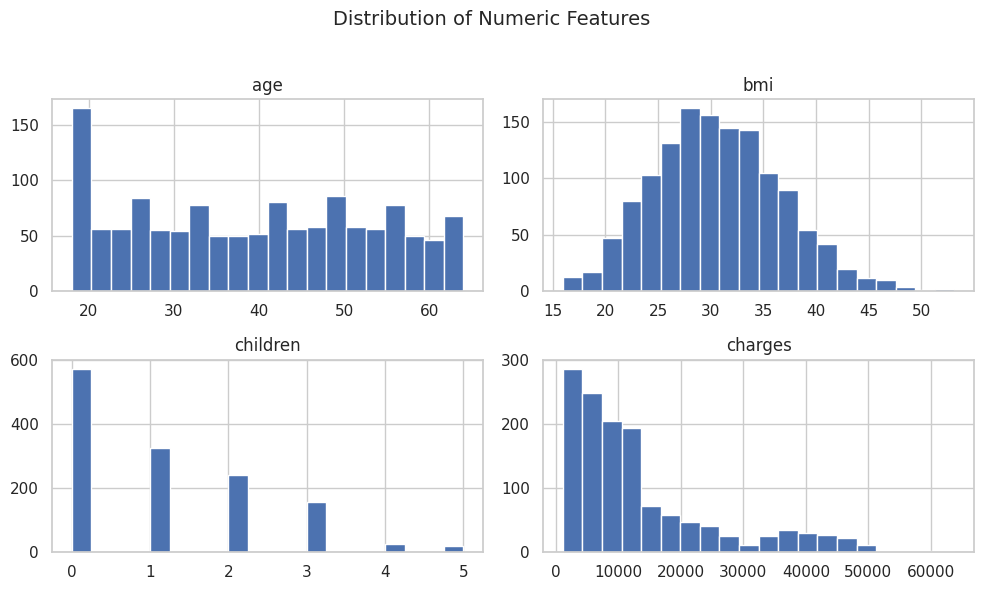

In [6]:
numeric_features = ['age', 'bmi', 'children', 'charges']

df[numeric_features].hist(bins=20, figsize=(10, 6), layout=(2, 2))
plt.suptitle("Distribution of Numeric Features", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Observations:
- Age appears evenly distributed.
- BMI is slightly right-skewed, centred around 25–35.
- Children mostly between 0–2 dependents.
- Charges show a long right tail — a small subset pay extremely high amounts.

# Outlier Detection with Boxplots

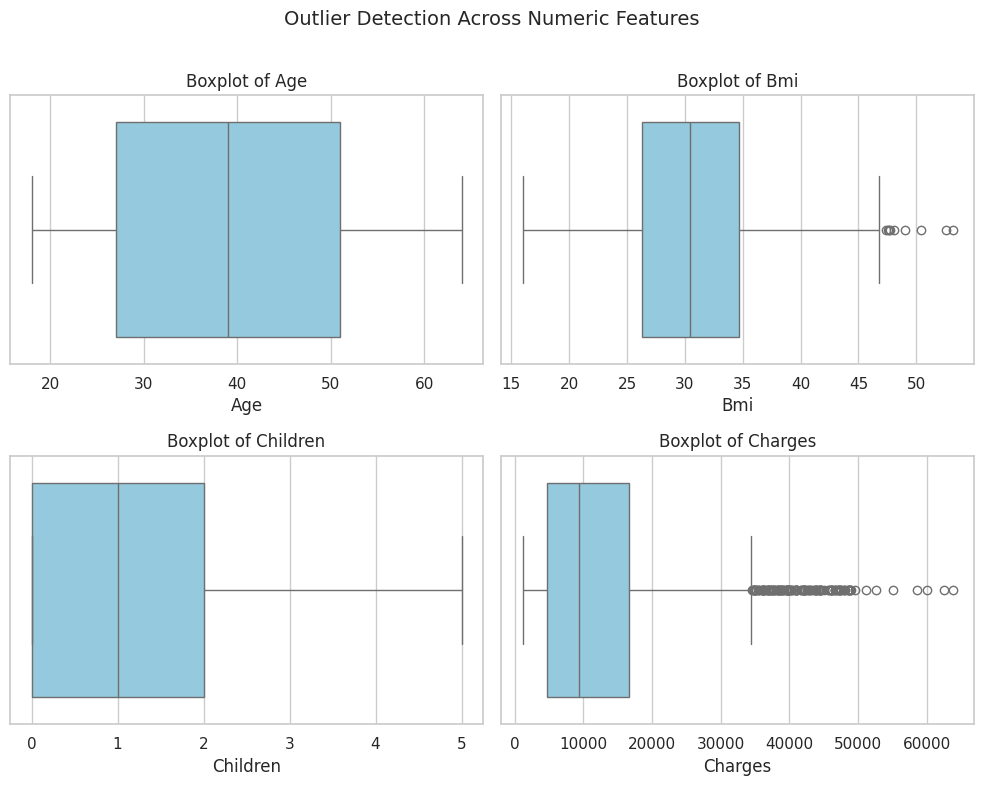

In [7]:
numeric_features = ['age', 'bmi', 'children', 'charges']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.flatten()

for i, col in enumerate(numeric_features):
    sns.boxplot(x=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f"Boxplot of {col.capitalize()}")
    axes[i].set_xlabel(col.capitalize())

plt.suptitle("Outlier Detection Across Numeric Features", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


### Observations:
- charges and bmi show visible outliers.
- The distribution suggests a few high-cost individuals likely linked to smoking or chronic illness.

---

# Categorical Feature Distributions

In [9]:
categorical_features = ['sex', 'smoker', 'region']

for col in categorical_features:
    counts = df[col].value_counts().reset_index()
    counts.columns = [col, 'count']  # rename for clarity

    fig = px.bar(
        counts,
        x=col,
        y='count',
        title=f"Distribution of {col.replace('_', ' ').capitalize()}",
        labels={col: col.capitalize(), 'count': 'Count'},
        color=col
    )
    fig.show()

## Observation:
- Dataset is well balanced across gender and region.
- ~20% are smokers, providing good comparison groups for H1–H6.

# Correlation Analysis

## Correlation Analysis Preparation

In [16]:
df_corr = df.copy()

encoding_map = {
    'sex': {'male': 0, 'female': 1},
    'smoker': {'no': 0, 'yes': 1},
    'region': {'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3}
}
df_corr = df_corr.drop(columns=['bmi_category', 'age_group', 'family_size_category'])
df_corr.replace(encoding_map, inplace=True)
df_corr.head()


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520


### Explanation:
Categorical variables are encoded numerically to allow correlation analysis with continuous features.

## Correlation Heatmap

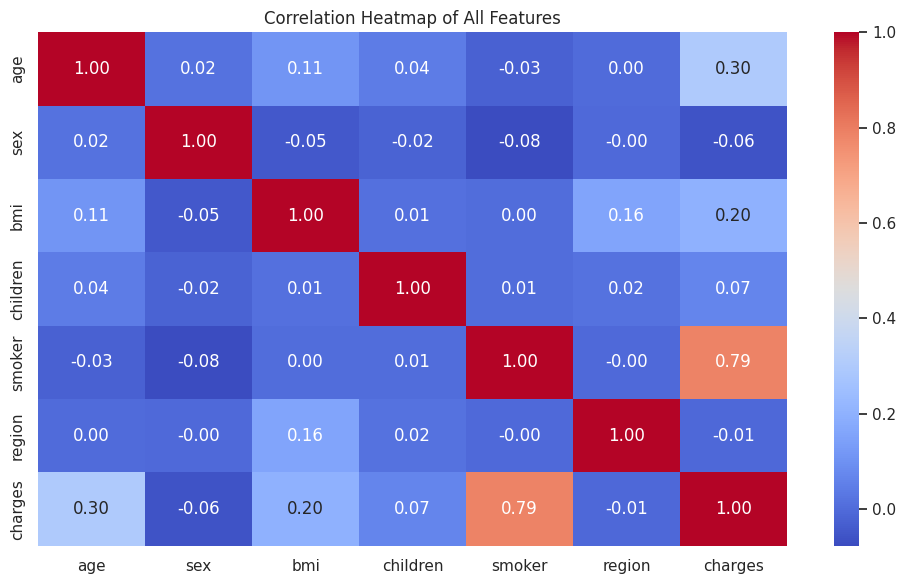

In [17]:
plt.figure(figsize=(10, 6))
corr = df_corr.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of All Features")
plt.tight_layout()

os.makedirs("reports/figures", exist_ok=True)
plt.savefig("reports/figures/correlation_heatmap.png", dpi=300)
plt.show()


### Observation:
- smoker, age, and bmi have the strongest positive correlations with charges.
- Confirms H1, H2, and H3 quantitatively.
- sex and region show weak or no correlation — supporting H4 and H5.

## Top Correlations with Charges

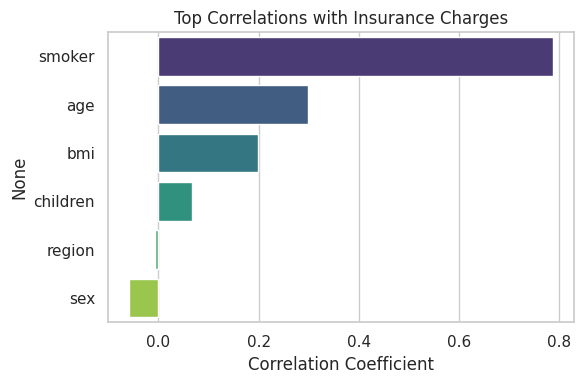

In [ ]:
charges_corr = corr['charges'].sort_values(ascending=False)
top_corr = charges_corr[1:7] # Exclude self-correlation

plt.figure(figsize=(6, 4))
sns.barplot(x=top_corr.values, y=top_corr.index, palette="viridis")
plt.title("Top Correlations with Insurance Charges")
plt.xlabel("Correlation Coefficient")
plt.tight_layout()
plt.show()

### Observation:
- Confirms smoking, age, and BMI as top contributors to cost variation.
- Children and gender have minimal impact.

# Hypotheses

## H1: Smoking Status Impact on Charges

In [19]:
fig = px.box(
    df,
    x='smoker',
    y='charges',
    color='smoker',
    title="H1: Insurance Charges by Smoking Status",
    points='all'
)
fig.show()


### Observation:
- Smokers have dramatically higher median and mean insurance charges.
- This confirms H1, showing smoking is the single largest driver of cost increases.

## H2: BMI vs Insurance Charges

In [20]:
fig = px.scatter(
    df,
    x='bmi',
    y='charges',
    color='smoker',
    trendline='ols',
    title="H2: BMI vs Insurance Charges (coloured by Smoker)"
)
fig.show()

### Observation:
- A positive correlation exists between BMI and charges.
- Smokers with high BMI show particularly high expenses, supporting H2.